# Machine learning prediction of heart disease


The goal of this notebook is to develop a machine learning model that predicts whether or not someone has heart disease based on their medical characteristics using Python-based machine learning libraries.

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Is it possible to predict whether a patient is suffering from heart disease based on clinical parameters?

## 2. Data

The original data came from IEEEDataPort
A link is available for everyone who wants to observe the dataset. https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive


## 3. Evaluation

> During the proof of concept phase, if we are able to predict heart disease with 92% accuracy, we will proceed with the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* Age: Age of the patient
* Sex: Sex of the patient (1 = male; 0 = female)
* chest_pain_type: Chest Pain type

   * Value 1: Typical angina: chest pain related decrease blood supply to the heart
   * Value 2: Atypical angina: chest pain not related to heart
   * Value 3: Non-anginal pain: typically esophageal spasms (no heart related)
   * Value 4: Asymptomatic: chest pain not showing signs of disease
   
* resting_bp_s: resting blood pressure
* cholesterol: serum cholesterol 
* fasting_blood_sugar: fasting blood sugar, (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* resting_ecg: resting electrocardiogram results 

   * Value 0: normal
   * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
   
* max_heart_rate: maximum heart rate achieved
* exercise_angina: exercise induced angina (1 = yes; 0 = no)
* oldpeak: oldpeak = ST
* ST_slope: the slope of the peak exercise ST segment

    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
    
* target: class (1 = heart disease, 0 = Normal)

## Preparing the tools

We're going to use Pandas, Matplotlib, and Numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, make_scorer, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv("heart_disease.csv")
df.shape # (rows, columns)

(1190, 12)

## Data Exploration (exploratory analysis or EDA)


In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
# Rename the columns

df.columns = ["age", "sex", "chest_pain_type", "resting_bp_s", "cholesterol", "fasting_blood_sugar", "resting_ecg", "max_heart_rate",
             "exercise_angina", "oldpeak", "ST_slope", "target"]

In [6]:
df["target"].value_counts()

1    629
0    561
Name: target, dtype: int64

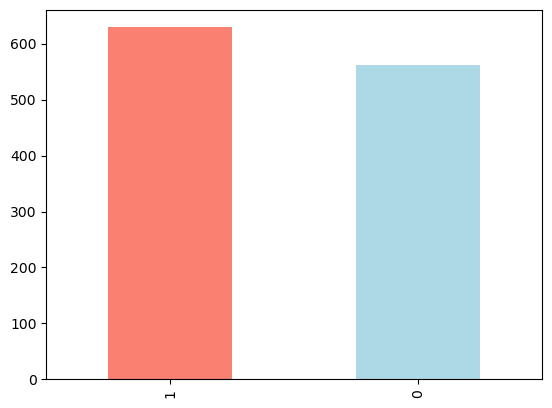

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [9]:
#Are there any missing values?

df.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64

In [10]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

1    909
0    281
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,211,350
1,70,559


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

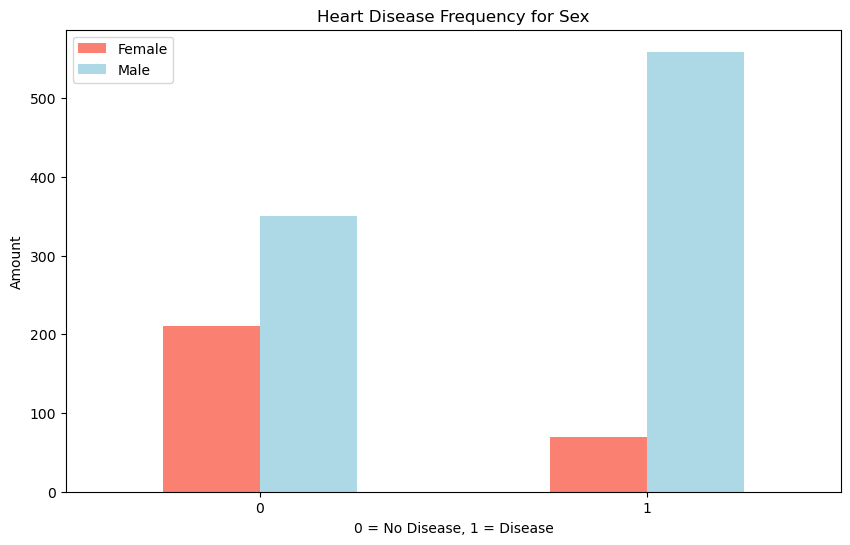

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [14]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Age vs. Max Heart Rate for Heart Disease



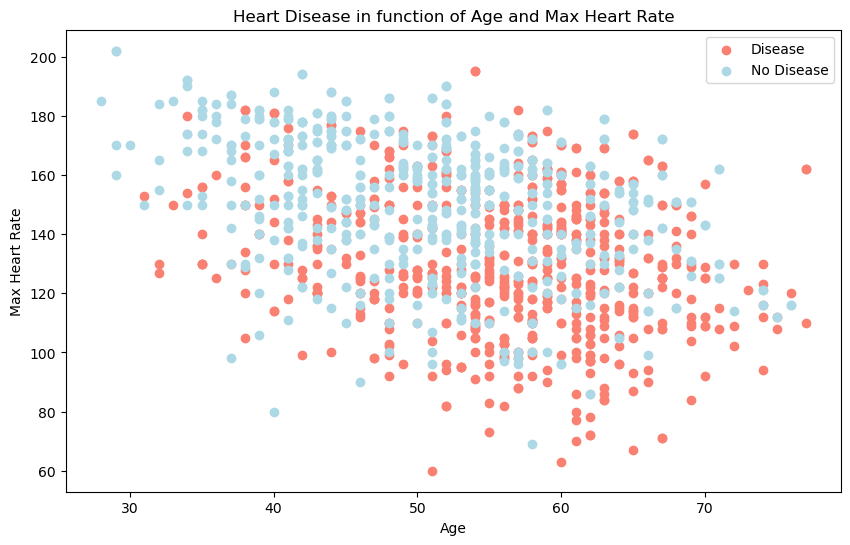

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.max_heart_rate[df.target==1],
           c="salmon")

# Scatter with negative example
plt.scatter(df.age[df.target==0],
           df.max_heart_rate[df.target==0],
           c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

Text(0, 0.5, 'Max Heart Rate')

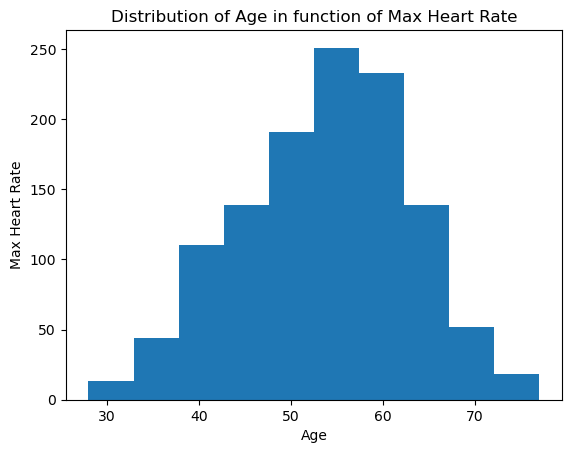

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()
plt.title("Distribution of Age in function of Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")


### Heart Disease Frequency per Chest Pain Type


In [17]:
pd.crosstab(df.chest_pain_type, df.target)

target,0,1
chest_pain_type,,
1,41,25
2,185,31
3,193,90
4,142,483


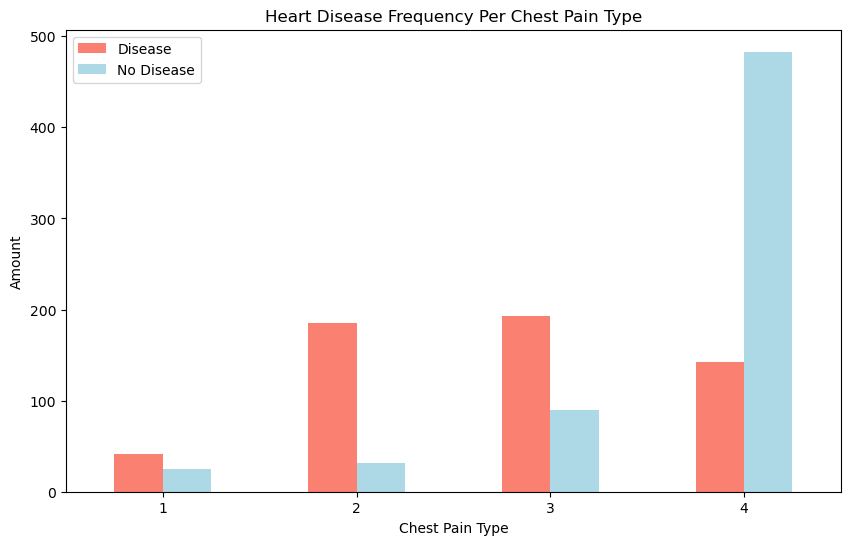

In [18]:
# Make the crosstab more visual
pd.crosstab(df.chest_pain_type, df.target).plot(kind="bar",
                                               figsize=(10, 6),
                                               color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [20]:
# Make a correlation matrix
df.corr()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest_pain_type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting_bp_s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting_blood_sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting_ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max_heart_rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise_angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


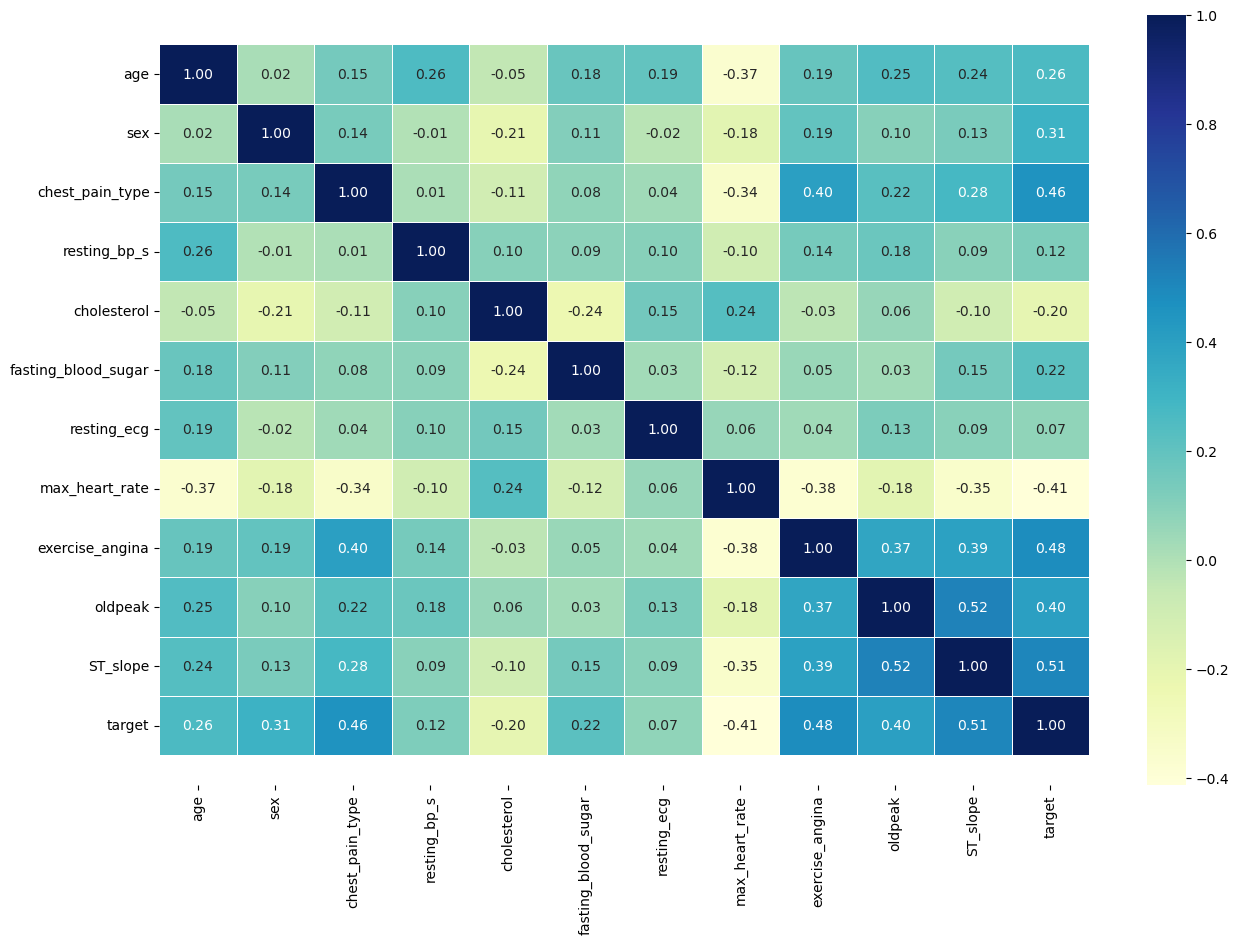

In [21]:
# Correlation Matrix visual

corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 5. Modelling

In [22]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [23]:
# Split data into X and Y
x = df.drop("target", axis=1)
y = df["target"]

In [24]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
x_train

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
1005,63,1,4,130,330,1,2,132,1,1.8,1
224,33,1,3,120,298,0,0,185,0,0.0,1
798,56,0,4,134,409,0,2,150,1,1.9,2
816,77,1,4,125,304,0,2,162,1,0.0,1
427,56,1,2,126,166,0,1,140,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1044,58,1,4,125,300,0,2,171,0,0.0,1
1095,55,1,2,130,262,0,0,155,0,0.0,1
1130,61,1,1,134,234,0,0,145,0,2.6,2
860,62,0,4,140,268,0,2,160,0,3.6,3


In [26]:
y_train, len(y_train)

(1005    1
 224     0
 798     1
 816     1
 427     0
        ..
 1044    1
 1095    0
 1130    1
 860     1
 1126    0
 Name: target, Length: 952, dtype: int64,
 952)

I split our data into training and test sets; Nest step is to build the machine learning model.

I will find the patterns on the training set, and I will see the patterns on the test set.

I will try three different machine learning models, 
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit_Learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

{'Logistic Regression': 0.8319327731092437,
 'KNN': 0.7184873949579832,
 'Random Forest': 0.9453781512605042}

### Model Comparison

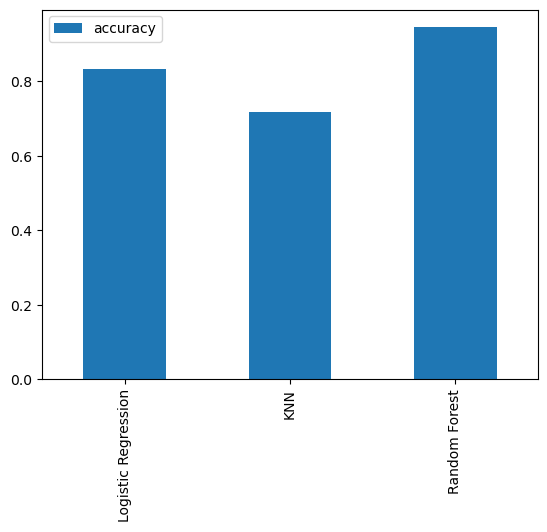

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Experimenting further with our based models

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [30]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [31]:
train_scores

[1.0,
 0.9096638655462185,
 0.8728991596638656,
 0.805672268907563,
 0.7878151260504201,
 0.7741596638655462,
 0.7783613445378151,
 0.7615546218487395,
 0.7689075630252101,
 0.7605042016806722,
 0.7741596638655462,
 0.7804621848739496,
 0.7647058823529411,
 0.7478991596638656,
 0.7436974789915967,
 0.7394957983193278,
 0.7352941176470589,
 0.7331932773109243,
 0.7342436974789915,
 0.7342436974789915]

In [32]:
test_scores

[0.7689075630252101,
 0.6890756302521008,
 0.6848739495798319,
 0.7352941176470589,
 0.7184873949579832,
 0.726890756302521,
 0.7394957983193278,
 0.7100840336134454,
 0.7352941176470589,
 0.7352941176470589,
 0.7478991596638656,
 0.7394957983193278,
 0.7647058823529411,
 0.7478991596638656,
 0.7478991596638656,
 0.7310924369747899,
 0.7184873949579832,
 0.7310924369747899,
 0.726890756302521,
 0.7436974789915967]

Maximum KNN score on the test data: 76.89%


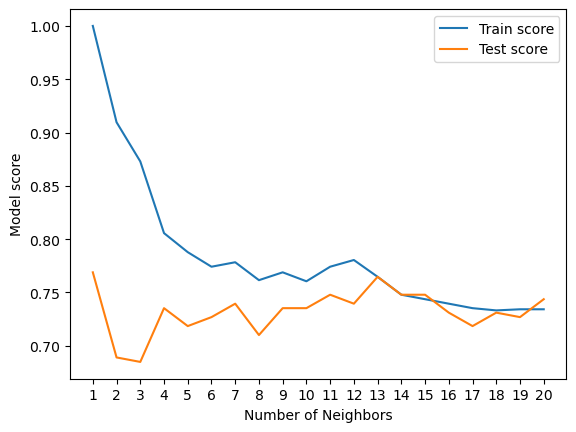

In [33]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

Using RandomizedSearchCV, I will tune the following:
* LogisticRegression()
* RandomForestClassifier()

In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Hyperparameter grids setup for each model are ready for tuning them using RandomizedSearchCV.

In [35]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv=5,
                               n_iter=30,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.3738237958832638}

In [37]:
rs_log_reg.score(x_test, y_test)

0.8445378151260504

LogisticRegression is tuned; I will do the same for the RandomForestClassifier

In [38]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=30,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [40]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.9201680672268907

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

> Cross-validation will be used when it's possible.

In [41]:
# Make predictions with tuned model
y_preds = rs_rf.predict(x_test)

In [42]:
y_preds

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [43]:
y_test

390     1
247     1
260     0
155     1
984     1
       ..
535     1
1037    0
812     0
139     1
599     1
Name: target, Length: 238, dtype: int64

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


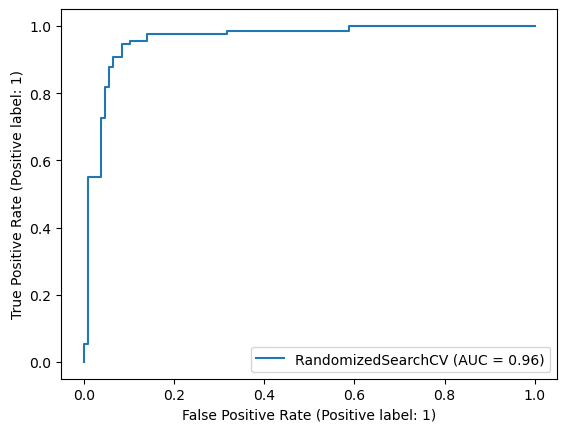

In [44]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, x_test, y_test)

In [45]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 94  13]
 [  6 125]]


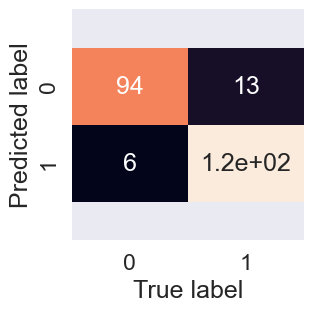

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

The model contains 13 false no disease values and 6 false disease values.

***Classification report and cross-validated precision, recall, and F1-score***

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       107
           1       0.91      0.95      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



***Explanation about the classification report***

Essentially, precision refers to how many positive identifications were made. This is also referred to as the model predicting class one, which means that it has a heart condition, which is correct. For example, when the True label is 0 and the Predictive label is 1, then the model should produce no false positives.

The recall measures how many actual positives were correctly colored. Therefore, a model that produces no false negatives has a recall of 1. If the model produces no false negatives, then it has a recall of 1, and if it has a precision of 1, it will have a 0 for True label 0, and a 1 for Predicted label 1. The precision and recall of the current model would each be one if it were perfect.

Our F1-score is a combination of precision and recall; if our model is perfect, and has precision and recall scores of 1.0, then our F1-score would also be 1.0.

Support indicates the number of samples used for the calculation of each metric in our test data set. In total, 107 samples have a value of 0 and 131 samples have a value of 1.

Macro average refers to the average precision, recall, and F1-score between classes 0 and 1 (disease or no disease). The macro average does not take into account class imbalances. The numbers for the values (Disease, no disease) are relatively similar in our case, so there is no class imbalance.

Weighted averages are calculated by averaging precision, recall, and F1-scores. This means that each metric is calculated according to the number of samples in each class.

### Calculate evaluation metrics using cross-validation.

Calculate accuracy, precision, recall, and F1-score using cross-validation and more specifically cross_val_score()

In [48]:
# Check best hyperparameters
best_params = rs_rf.best_params_
best_params

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [49]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(x, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=560)

In [50]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")


for i, score in enumerate(cv_acc):
    print(f"Accuracy for trial {i + 1}: {score}")

# Print the mean of these values
mean_acc = np.mean(cv_acc)
print(f"\nThe mean accuracy of the model is {mean_acc:.4f}")


Accuracy for trial 1: 0.8991596638655462
Accuracy for trial 2: 0.8949579831932774
Accuracy for trial 3: 0.9369747899159664
Accuracy for trial 4: 0.8865546218487395
Accuracy for trial 5: 0.9033613445378151

The mean accuracy of the model is 0.9042


In [51]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                               scoring = make_scorer(precision_score))

for i, score in enumerate(cv_precision):
    print(f'Precision for trial {i+1}: {score:.16f}')
    
# Print the mean of the cross validation score
mean_precision = np.mean(cv_precision)
print(f"\nThe mean precision of the model is {mean_precision:.4f}")


Precision for trial 1: 0.9411764705882353
Precision for trial 2: 0.8482758620689655
Precision for trial 3: 0.9172932330827067
Precision for trial 4: 0.9067796610169492
Precision for trial 5: 0.9180327868852459

The mean precision of the model is 0.9063


In [52]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring=make_scorer(recall_score))

# Print the individual values of the cross validation score
for i, score in enumerate(cv_recall):
    print(f'Recall for trial {i+1}: {score:.16f}')

# Print the mean of the cross validation score
mean_recall = np.mean(cv_recall)
print(f"\nThe mean recall of the model is {mean_recall:.4f}")


Recall for trial 1: 0.8880000000000000
Recall for trial 2: 0.9682539682539683
Recall for trial 3: 0.9603174603174603
Recall for trial 4: 0.8492063492063492
Recall for trial 5: 0.8809523809523809

The mean recall of the model is 0.9093


In [53]:
# Cross-validated for F1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring=make_scorer(f1_score))

# Print the individual values of the cross validation score
for i, score in enumerate(cv_f1):
    print(f'F1-score for trial {i+1}: {score:.16f}')

# Print the mean of the cross validation score
mean_f1 = np.mean(cv_f1)
print(f"\nThe mean f1-score of the model is {mean_f1:.4f}")

F1-score for trial 1: 0.9090909090909089
F1-score for trial 2: 0.9037037037037037
F1-score for trial 3: 0.9384615384615386
F1-score for trial 4: 0.8888888888888890
F1-score for trial 5: 0.9076305220883534

The mean f1-score of the model is 0.9096


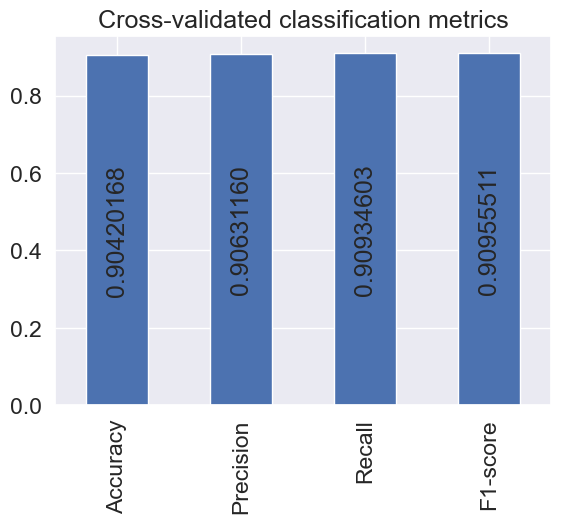

In [54]:
# Visualize cross-validated metrics using the mean function for accuracy, precision, recall, and F1
cv_metrics = pd.DataFrame({
    "Accuracy": mean_acc,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1-score": mean_f1
}, index=[0])

# Create the bar plot
ax = cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

# Add the values to the bars
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    text = f"{height:.8f}"
    ax.text(rect.get_x() + rect.get_width()/2, height/2, text, ha='center', va='center', rotation=90)

plt.show()


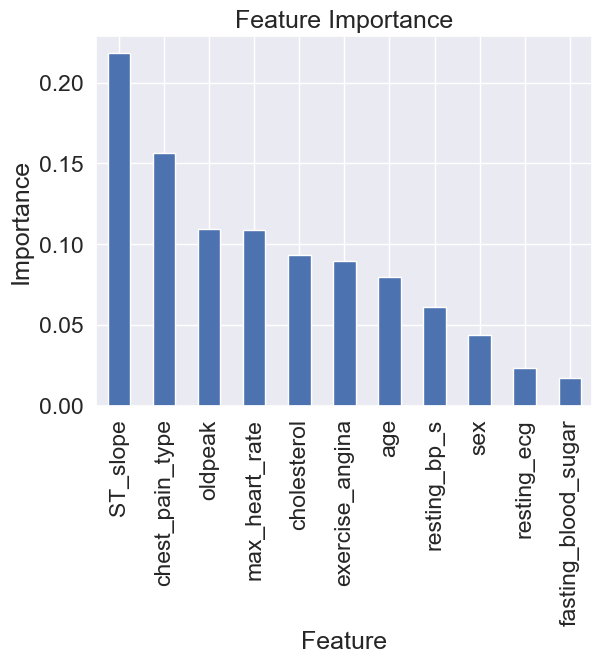

In [55]:
# Fit the classifier to the data
clf.fit(x_train, y_train)

# Get the feature importance
importance = clf.feature_importances_

# Create a dataframe of feature importance
importance_df = pd.DataFrame(importance, index=x.columns, columns=["Importance"])

# Sort the dataframe by importance
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# Plot the feature importance
importance_df.plot.bar(title="Feature Importance", legend=False)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [56]:
# Put models in a dictionary
models = {"Random Forest": RandomForestClassifier()}
# Fit the model to the train set
models["Random Forest"].fit(x_train, y_train)

RandomForestClassifier()

In [57]:
new_data = pd.DataFrame({
    "age" : 49,
    "sex" : 1, 
    "chest_pain_type" : 2,
    "resting_bp_s" : 121,
    "cholesterol" : 134,
    "fasting_blood_sugar" : 1,
    "resting_ecg" : 0,
    "max_heart_rate" : 195,
    "exercise_angina" : 1,
    "oldpeak" : 3.0,
    "ST_slope" : 2, 
}, index=[0])

In [58]:
new_data

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
0,49,1,2,121,134,1,0,195,1,3.0,2


In [59]:
import joblib
p = models["Random Forest"].predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

Disease


In [60]:
joblib.dump(models["Random Forest"].fit(x, y),"model_joblib_heart")

['model_joblib_heart']

In [61]:
model = joblib.load("model_joblib_heart")

In [62]:
model.predict(new_data)

array([1])

In [63]:
from tkinter import *
import joblib

def check_credentials():
    if username.get() == "Ioannis" and password.get() == "Ntoulis":
        master.destroy()
        show_entry_fields()
    else:
        Label(master, text="Invalid Credentials").grid(row=5, column=1)

master = Tk()
master.title("Login")

Label(master, text="Username").grid(row=0)
username = Entry(master)
username.grid(row=0, column=1)

Label(master, text="Password").grid(row=1)
password = Entry(master, show="*")
password.grid(row=1, column=1)

Button(master, text='Submit', command=check_credentials).grid(row=3, column=0, sticky=W, pady=4)

mainloop()


def show_entry_fields():
    p1 = age.get()
    p2 = gender.get()
    p3 = chest_pain.get()
    p4 = bp_s.get()
    p5 = cholesterol.get()
    p6 = fbs.get()
    p7 = ecg.get()
    p8 = max_hr.get()
    p9 = angina.get()
    p10 = oldpeak.get()
    p11 = slope.get()
    
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease. It is important that you seek immediate medical attention.").grid(row=31)
    

master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text="Heart Disease Prediction System \n Please refer to the data dictionary to insert each value \nAfter each prediction, you need to close and restart the program from the notebook.",
              bg="black", fg="white").grid(row=0, columnspan=2)

Label(master, text="Enter Your Age").grid(row=5)
age = Spinbox(master, from_=18, to=100, width=5)
age.grid(row=5, column=1)

Label(master, text="Male Or Female [1/0]").grid(row=6)
gender = Spinbox(master, values=(0, 1), width=5)
gender.grid(row=6, column=1)

Label(master, text="Enter Value of Chest Pain Type").grid(row=7)
chest_pain = Spinbox(master, from_=0, to=4, width=5)
chest_pain.grid(row=7, column=1)

Label(master, text="Enter Value of Resting bp s").grid(row=8)
bp_s = Spinbox(master, from_=90, to=200, width=5)
bp_s.grid(row=8, column=1)

Label(master, text="Enter Value of Cholesterol").grid(row=9)
cholesterol = Spinbox(master, from_=100, to=500, width=5)
cholesterol.grid(row=9, column=1)

Label(master, text="Enter Value of Fasting Blood Sugar").grid(row=10)
fbs = Spinbox(master, from_=0, to=2, width=5)
fbs.grid(row=10, column=1)

Label(master, text="Enter Value of Resting ecg").grid(row=11)
ecg = Spinbox(master, from_=0, to=2, width=5)
ecg.grid(row=11, column=1)

Label(master, text="Enter Value of Max Heart Rate").grid(row=12)
max_hr_value = StringVar()
max_hr = Spinbox(master, from_=100, to=200, width=5, textvariable=max_hr_value)
max_hr.grid(row=12, column=1)

Label(master, text="Enter Value of Exercise Angina").grid(row=13)
angina = Spinbox(master, from_=0, to=2, width=5)
angina.grid(row=13, column=1)

Label(master, text="Enter Value of Old Peak").grid(row=14)
oldpeak = Spinbox(master, from_=0, to=10, width=5)
oldpeak.grid(row=14, column=1)

Label(master, text="Enter Value of Slope").grid(row=15)
slope = Spinbox(master, from_=0, to=3, width=5)
slope.grid(row=15, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=17, column=0, sticky=W, pady=4)

mainloop()
